In [0]:
path = 'https://raw.githubusercontent.com/umangkejriwal1122/Machine-Learning/master/Data%20Sets/covid_19_clean_complete.csv'

In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px     ### potting data on world map
import matplotlib.pyplot as plt

In [8]:
df = pd.read_csv(path)
df.head()

Province/State Country/Region      Lat  ...  Confirmed Deaths  Recovered
0            NaN    Afghanistan  33.0000  ...          0      0          0
1            NaN        Albania  41.1533  ...          0      0          0
2            NaN        Algeria  28.0339  ...          0      0          0
3            NaN        Andorra  42.5063  ...          0      0          0
4            NaN         Angola -11.2027  ...          0      0          0

[5 rows x 8 columns]

In [10]:
df.drop(['Province/State'],axis=1,inplace=True)
df.head()

Country/Region      Lat     Long     Date  Confirmed  Deaths  Recovered
0    Afghanistan  33.0000  65.0000  1/22/20          0       0          0
1        Albania  41.1533  20.1683  1/22/20          0       0          0
2        Algeria  28.0339   1.6596  1/22/20          0       0          0
3        Andorra  42.5063   1.5218  1/22/20          0       0          0
4         Angola -11.2027  17.8739  1/22/20          0       0          0

In [0]:
df = df.rename(columns={"Country/Region":"country"})

In [12]:
df.head()

country      Lat     Long     Date  Confirmed  Deaths  Recovered
0  Afghanistan  33.0000  65.0000  1/22/20          0       0          0
1      Albania  41.1533  20.1683  1/22/20          0       0          0
2      Algeria  28.0339   1.6596  1/22/20          0       0          0
3      Andorra  42.5063   1.5218  1/22/20          0       0          0
4       Angola -11.2027  17.8739  1/22/20          0       0          0

In [0]:
active = df['Confirmed'] - df['Recovered'] - df['Deaths']

In [16]:
df['Active'] = active
df.tail()

country        Lat       Long  ... Deaths  Recovered  Active
25671                 France  46.885200 -56.315900  ...      0          0       1
25672            South Sudan   6.877000  31.307000  ...      0          0      34
25673         Western Sahara  24.215500 -12.885800  ...      0          5       1
25674  Sao Tome and Principe   0.186360   6.613081  ...      0          4       4
25675                  Yemen  15.552727  48.516388  ...      0          0       1

[5 rows x 8 columns]

In [18]:
#### Top Countries
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25676 entries, 0 to 25675
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   country    25676 non-null  object 
 1   Lat        25676 non-null  float64
 2   Long       25676 non-null  float64
 3   Date       25676 non-null  object 
 4   Confirmed  25676 non-null  int64  
 5   Deaths     25676 non-null  int64  
 6   Recovered  25676 non-null  int64  
 7   Active     25676 non-null  int64  
dtypes: float64(2), int64(4), object(2)
memory usage: 1.6+ MB


In [0]:
df['Date'] = pd.to_datetime(df['Date'])

In [21]:
df.head()

country      Lat     Long  ... Deaths  Recovered  Active
0  Afghanistan  33.0000  65.0000  ...      0          0       0
1      Albania  41.1533  20.1683  ...      0          0       0
2      Algeria  28.0339   1.6596  ...      0          0       0
3      Andorra  42.5063   1.5218  ...      0          0       0
4       Angola -11.2027  17.8739  ...      0          0       0

[5 rows x 8 columns]

In [23]:
top = df[df['Date'] == df['Date'].max()]
top.head()

country      Lat     Long  ... Deaths  Recovered  Active
25414  Afghanistan  33.0000  65.0000  ...     58        228    1542
25415      Albania  41.1533  20.1683  ...     30        431     289
25416      Algeria  28.0339   1.6596  ...    437       1651    1561
25417      Andorra  42.5063   1.5218  ...     41        398     304
25418       Angola -11.2027  17.8739  ...      2          6      19

[5 rows x 8 columns]

In [25]:
world = top.groupby('country')['Confirmed','Active','Recovered','Deaths'].sum().reset_index()
world.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



country  Confirmed  Active  Recovered  Deaths
0  Afghanistan       1828    1542        228      58
1      Albania        750     289        431      30
2      Algeria       3649    1561       1651     437
3      Andorra        743     304        398      41
4       Angola         27      19          6       2

In [0]:
#### Plot on World Map (Active Cases)

In [33]:
figure = px.choropleth(world,locations='country',locationmode='country names',color='Deaths',
                       color_continuous_scale='Peach',range_color=[1,1000],
                       title="Countries with Active Cases",hover_name='country')
figure.show()

In [44]:
##### Plot Worldwide Confimred Cases Vs Date
total_confirmed_cases = df.groupby('Date')['Date','Confirmed'].sum().reset_index()
total_death_cases = df.groupby('Date')['Date','Deaths'].sum().reset_index()
#total_confirmed_cases.tail()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



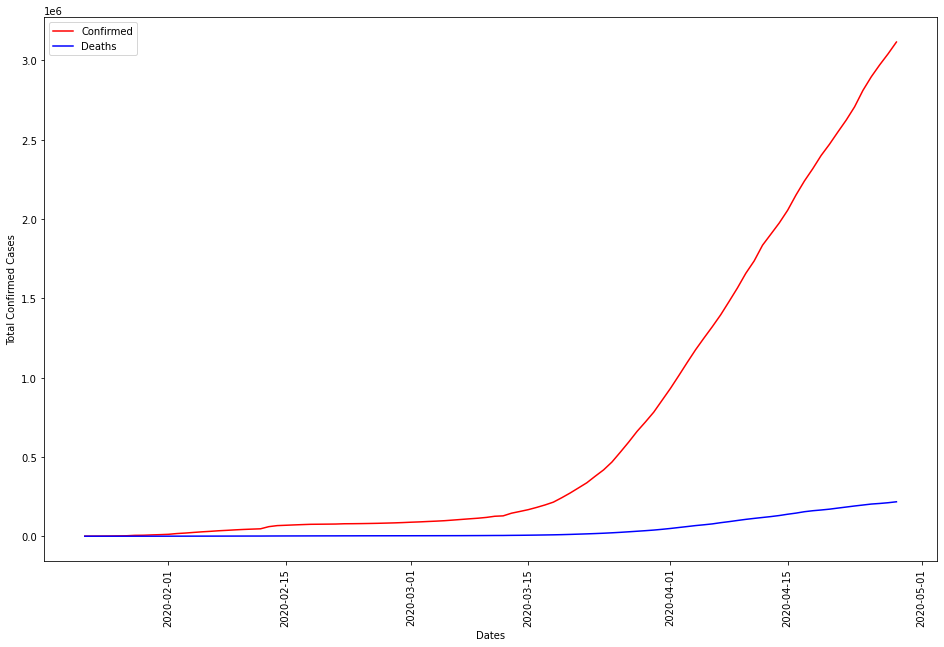

In [65]:
plt.figure(figsize=(16,10))
plt.xticks(rotation=90,fontsize=10)
plt.plot(total_confirmed_cases['Date'].dt.date,total_confirmed_cases['Confirmed'],color='red',label='Confirmed')
plt.plot(total_death_cases['Date'].dt.date,total_death_cases['Deaths'],color='blue',label='Deaths')
plt.xlabel("Dates")
plt.ylabel("Total Confirmed Cases")
plt.legend(loc=2)
plt.show()

In [49]:
#### Top 20 Countries having Most No. Confirmed Cases
top_confirmed = top.groupby('country')['Confirmed'].sum().sort_values(ascending=False).reset_index()
top_confirmed.head()

country  Confirmed
0              US    1012582
1           Spain     232128
2           Italy     201505
3          France     169053
4  United Kingdom     162350

In [50]:
top_20 = top_confirmed.head(20)
top_20

country  Confirmed
0               US    1012582
1            Spain     232128
2            Italy     201505
3           France     169053
4   United Kingdom     162350
5          Germany     159912
6           Turkey     114653
7           Russia      93558
8             Iran      92584
9            China      83940
10          Brazil      73235
11          Canada      51150
12         Belgium      47334
13     Netherlands      38607
14           India      31324
15            Peru      31190
16     Switzerland      29264
17        Portugal      24322
18         Ecuador      24258
19    Saudi Arabia      20077

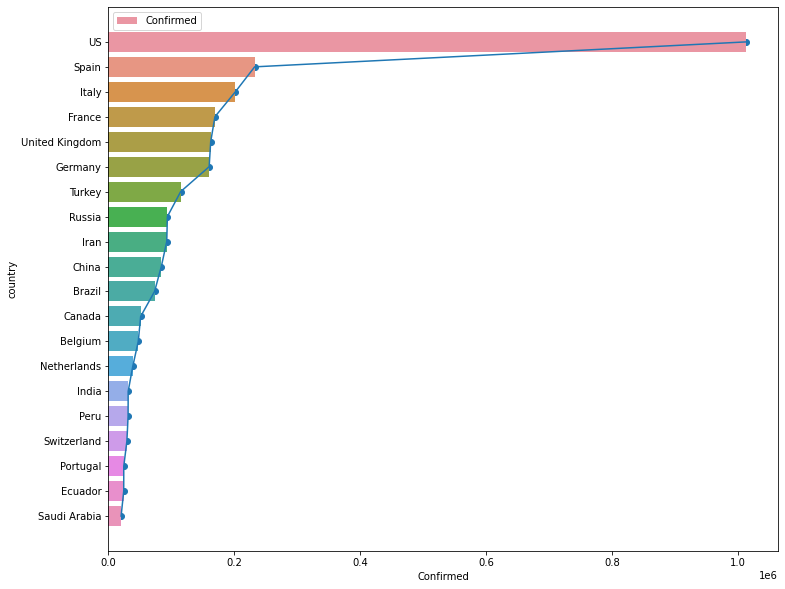

In [69]:
### Plotting the data
plt.figure(figsize=(12,10))
sns.barplot(top_20['Confirmed'],top_20['country'],label='Confirmed')
plt.plot(top_20['Confirmed'],top_20['country'])
plt.scatter(top_20['Confirmed'],top_20['country'])
plt.legend(loc=2)
plt.show()

In [0]:
#### Make the data frames for some countries

x= [1,2,3,4,5]
y=[10,20,20,30,40]
plt.bar(x,y,color='red')
plt.show()

In [81]:
#### Make the data frames for some countries
## China
china = df[df['country']=='China']
china = china.groupby('Date')['Active','Confirmed','Recovered','Deaths'].sum().reset_index()
china.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



Date  Active  Confirmed  Recovered  Deaths
0 2020-01-22     503        548         28      17
1 2020-01-23     595        643         30      18
2 2020-01-24     859        920         35      26
3 2020-01-25    1326       1406         38      42
4 2020-01-26    1971       2075         48      56

In [0]:
## Italy
italy = df[df['country']=='Italy']
italy = italy.groupby('Date')['Active','Confirmed','Recovered','Deaths'].sum().reset_index()
italy.head()

In [0]:
## India
india = df[df['country']=='India']
india = india.groupby('Date')['Active','Confirmed','Recovered','Deaths'].sum().reset_index()
india.head()

In [0]:
## US
us = df[df['country']=='US']
us = us.groupby('Date')['Active','Confirmed','Recovered','Deaths'].sum().reset_index()
us.head()

In [0]:
## Germany
germany = df[df['country']=='Germany']
germany = germany.groupby('Date')['Active','Confirmed','Recovered','Deaths'].sum().reset_index()
germany.head()

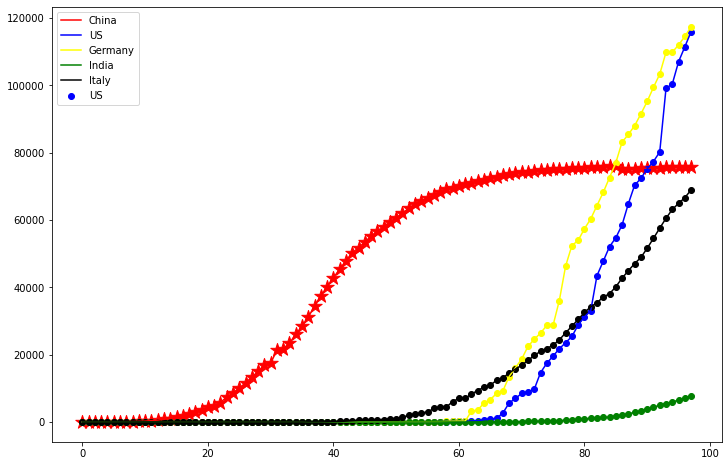

In [90]:
plt.figure(figsize=(12,8))
plt.plot(china.index,china['Recovered'],color='red',label='China')
plt.plot(us.index,us['Recovered'],color='blue',label='US')
plt.plot(germany.index,germany['Recovered'],color='yellow',label='Germany')
plt.plot(india.index,india['Recovered'],color='green',label='India')
plt.plot(italy.index,italy['Recovered'],color='black',label='Italy')
plt.scatter(china.index,china['Recovered'],color='red',marker='*',s=200)
plt.scatter(us.index,us['Recovered'],color='blue',label='US')
plt.scatter(germany.index,germany['Recovered'],color='yellow')
plt.scatter(india.index,india['Recovered'],color='green')
plt.scatter(italy.index,italy['Recovered'],color='black')
plt.legend(loc=2)
plt.show()

In [0]:
#### Forecasting Of Data 

In [0]:
### Fbprophet - Time Series Analysis(Forecasting) - Created by Facebook  ## ARIMA

### Forecasting for confirmed case

In [0]:
from fbprophet import Prophet

In [0]:
df.head()

In [113]:
df_india = df[df['country']=='India']
df_india.head()

country   Lat  Long       Date  Confirmed  Deaths  Recovered  Active
131    India  21.0  78.0 2020-01-22          0       0          0       0
393    India  21.0  78.0 2020-01-23          0       0          0       0
655    India  21.0  78.0 2020-01-24          0       0          0       0
917    India  21.0  78.0 2020-01-25          0       0          0       0
1179   India  21.0  78.0 2020-01-26          0       0          0       0

In [114]:
confirmed = df_india.groupby('Date')['Confirmed'].sum().reset_index()
confirmed.head()

Date  Confirmed
0 2020-01-22          0
1 2020-01-23          0
2 2020-01-24          0
3 2020-01-25          0
4 2020-01-26          0

In [115]:
#### Acc. to the fbprophet - Date Comumn name should be 'ds' and data namme should be 'y'
confirmed = confirmed.rename(columns={"Date":"ds","Confirmed":"y"})
confirmed.tail()

ds      y
93 2020-04-24  24530
94 2020-04-25  26283
95 2020-04-26  27890
96 2020-04-27  29451
97 2020-04-28  31324

In [0]:
#### Building the model
model = Prophet(interval_width=0.95)

In [117]:
### Train the Model 
model.fit(confirmed)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [0]:
future_dates = model.make_future_dataframe(periods=7)

In [119]:
future_dates.tail(7)

ds
98  2020-04-29
99  2020-04-30
100 2020-05-01
101 2020-05-02
102 2020-05-03
103 2020-05-04
104 2020-05-05

In [0]:
forecast = model.predict(future_dates)

In [121]:
forecast[['ds','yhat','yhat_lower','yhat_upper']].tail(10)

ds          yhat    yhat_lower    yhat_upper
95  2020-04-26  26862.338526  26013.565428  27761.919806
96  2020-04-27  28164.752473  27279.247927  29079.525012
97  2020-04-28  29443.612747  28510.918776  30321.896979
98  2020-04-29  30540.327384  29646.917404  31437.499008
99  2020-04-30  31773.467735  30906.023437  32706.708743
100 2020-05-01  32949.515342  32006.225132  33818.978552
101 2020-05-02  34211.478572  33363.588978  35115.854532
102 2020-05-03  35486.990041  34503.644003  36388.347025
103 2020-05-04  36789.403988  35690.274866  37897.502125
104 2020-05-05  38068.264262  36931.357615  39190.813994

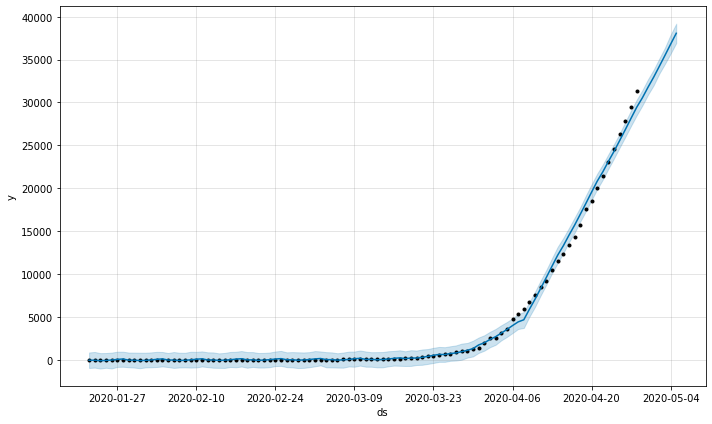

In [122]:
### Plot the data
confirmed_plot = model.plot(forecast)

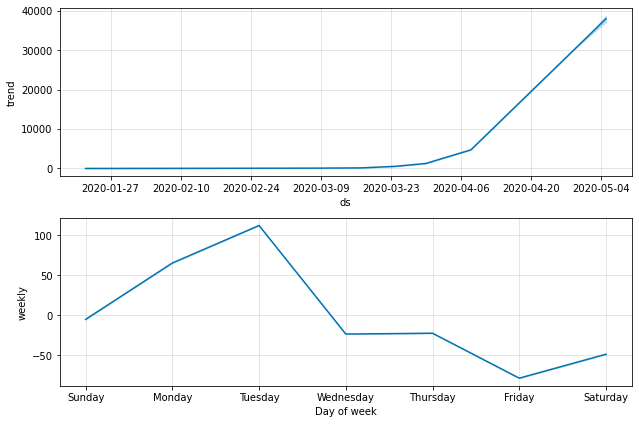

In [123]:
### Plot the data
confirmed_plot_weekly = model.plot_components(forecast)